In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

from kmer_model import KmerLinearRegressor

In [2]:
src_file = "../../regression_multiple/UTR3_zscores_replicateagg.csv"
src_file_code = os.path.basename(src_file).partition("_")[0]
data = pd.read_csv(src_file)
data

,seq,cell_type,fold,1,2,3,4,mass_center,mass_center_mean,diff,zscore,mass_center_std
0,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c1,train,6.809279,5.843161,5.836944,23.948600,3.105728,2.808993,0.296735,1.776328,0.167050
1,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c13,train,42.009822,34.532234,32.334772,56.966098,2.628650,2.808993,-0.180343,-1.079579,0.167050
2,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c17,train,50.033644,45.049730,54.291393,110.129539,2.865176,2.808993,0.056183,0.336323,0.167050
3,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c2,train,26.001559,44.713552,22.349163,57.504485,2.739573,2.808993,-0.069420,-0.415567,0.167050
4,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c4,train,37.901689,46.250624,55.515132,80.376985,2.810597,2.808993,0.001604,0.009603,0.167050
...,...,...,...,...,...,...,...,...,...,...,...,...
170551,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c13,train,20.230416,15.444105,17.989054,34.789154,2.761276,2.632063,0.129213,0.873196,0.147977
170552,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c17,train,50.443141,46.962936,78.430440,73.845290,2.703607,2.632063,0.071544,0.483479,0.147977
170553,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c2,train,25.691550,24.562474,16.716270,22.217946,2.397593,2.632063,-0.234470,-1.584508,0.147977
170554,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c4,train,27.196027,36.635834,36.296656,41.531913,2.650601,2.632063,0.018538,0.125276,0.147977


In [3]:
predict_col = "mass_center_mean"
predict_col_ct = "mass_center"

In [4]:
data_unique = data[["seq", "cell_type", "fold", predict_col]].drop_duplicates()
train = data_unique[data_unique["fold"] == "train"]
test = data_unique[data_unique["fold"] == "test"]

In [5]:
data_unique_ct = data[["seq", "cell_type", "fold", predict_col_ct]].drop_duplicates()
train_ct = data_unique_ct[data_unique_ct["fold"] == "train"]
test_ct = data_unique_ct[data_unique_ct["fold"] == "test"]

## Defining cell types

In [6]:
cell_types = sorted(train["cell_type"].unique())
cell_types

['c1', 'c13', 'c17', 'c2', 'c4', 'c6']

## Regressing `k=3`

Text(0.5, 0.98, 'UTR3: KmerLinearRegressor, k=3')

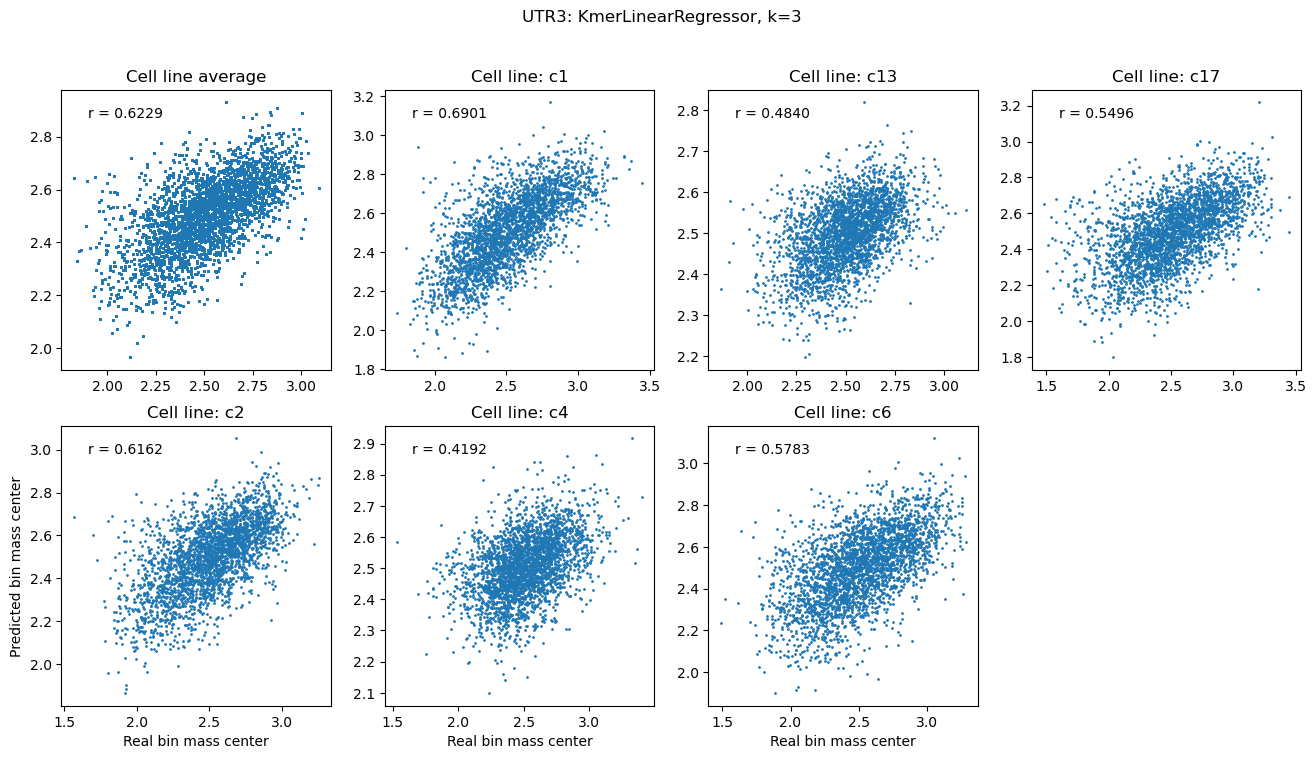

In [7]:
k = 3
cols = 4
rows = 2
fig = plt.figure(figsize=(16, 8))

ax = plt.subplot(rows, cols, 1)
regressor = KmerLinearRegressor(complement=False, kmer_length=3,
                                linreg_kws=None)
regressor.fit(train["seq"], train[predict_col])
pred = regressor.predict(test["seq"])

r = ss.pearsonr(test[predict_col], pred).statistic
ax.scatter(test[predict_col], pred, s=1)
plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)
plt.title("Cell line average")

for i, ct in enumerate(cell_types, 2):
    train_ctdf = train_ct[train_ct["cell_type"] == ct]
    test_ctdf = test_ct[test_ct["cell_type"] == ct]
    regressor = KmerLinearRegressor(complement=False, kmer_length=k,
                                    linreg_kws=None)
    regressor.fit(train_ctdf["seq"], train_ctdf[predict_col_ct])
    pred = regressor.predict(test_ctdf["seq"])

    ax = plt.subplot(rows, cols, i)
    r = ss.pearsonr(test_ctdf[predict_col_ct], pred).statistic
    ax.scatter(test_ctdf[predict_col_ct], pred, s=1)
    plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)
    
    plt.title(f"Cell line: {ct}")
    if (i - 1) // cols == rows - 1:
        plt.xlabel("Real bin mass center")
    if i % cols == 1:
        plt.ylabel("Predicted bin mass center")
plt.suptitle(f"{src_file_code}: KmerLinearRegressor, k={k}")

## Regressing `k=2`

Text(0.5, 0.98, 'UTR3: KmerLinearRegressor, k=2')

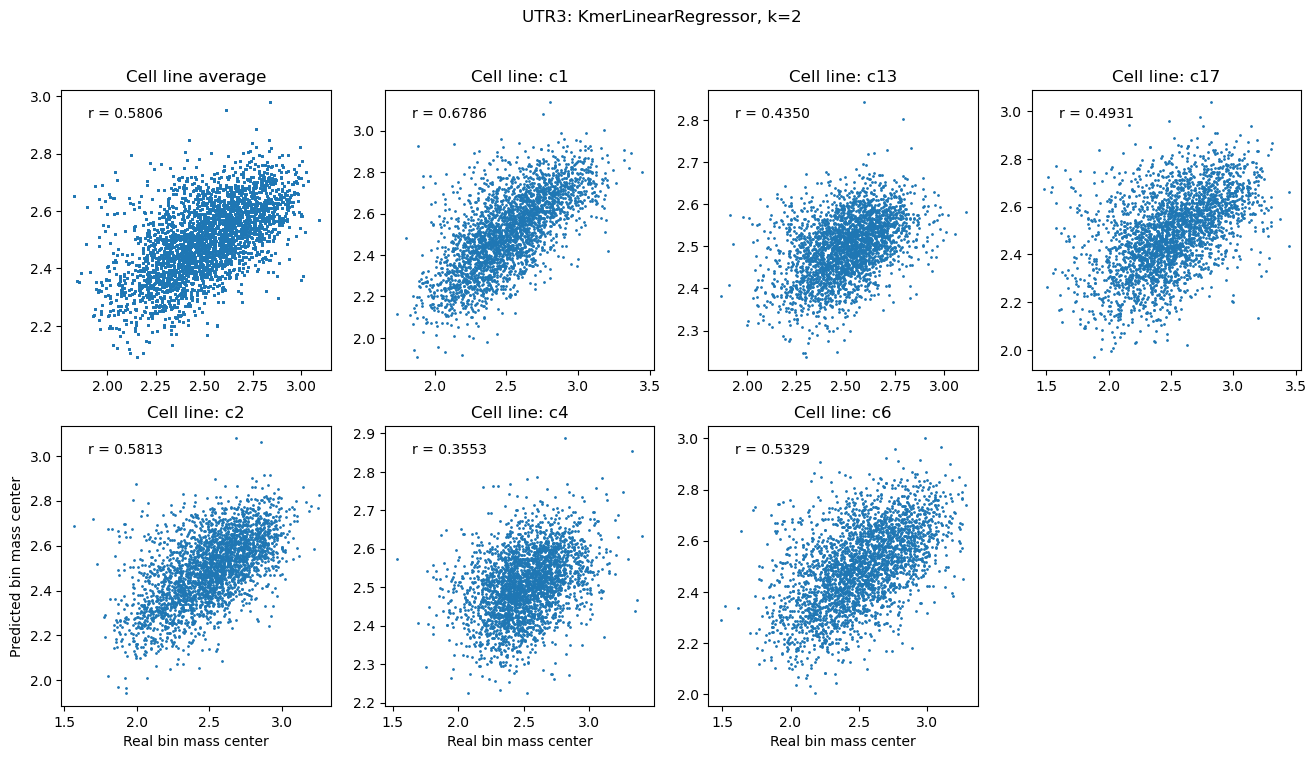

In [8]:
k = 2
cols = 4
rows = 2
fig = plt.figure(figsize=(16, 8))

ax = plt.subplot(rows, cols, 1)
regressor = KmerLinearRegressor(complement=False, kmer_length=k,
                                linreg_kws=None)
regressor.fit(train["seq"], train[predict_col])
pred = regressor.predict(test["seq"])

r = ss.pearsonr(test[predict_col], pred).statistic
ax.scatter(test[predict_col], pred, s=1)
plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)
plt.title("Cell line average")

for i, ct in enumerate(cell_types, 2):
    train_ctdf = train_ct[train_ct["cell_type"] == ct]
    test_ctdf = test_ct[test_ct["cell_type"] == ct]
    regressor = KmerLinearRegressor(complement=False, kmer_length=k,
                                    linreg_kws=None)
    regressor.fit(train_ctdf["seq"], train_ctdf[predict_col_ct])
    pred = regressor.predict(test_ctdf["seq"])

    ax = plt.subplot(rows, cols, i)
    r = ss.pearsonr(test_ctdf[predict_col_ct], pred).statistic
    ax.scatter(test_ctdf[predict_col_ct], pred, s=1)
    plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)
    
    plt.title(f"Cell line: {ct}")
    if (i - 1) // cols == rows - 1:
        plt.xlabel("Real bin mass center")
    if i % cols == 1:
        plt.ylabel("Predicted bin mass center")
plt.suptitle(f"{src_file_code}: KmerLinearRegressor, k={k}")

## Regressing `k=1`

Text(0.5, 0.98, 'UTR3: KmerLinearRegressor, k=1')

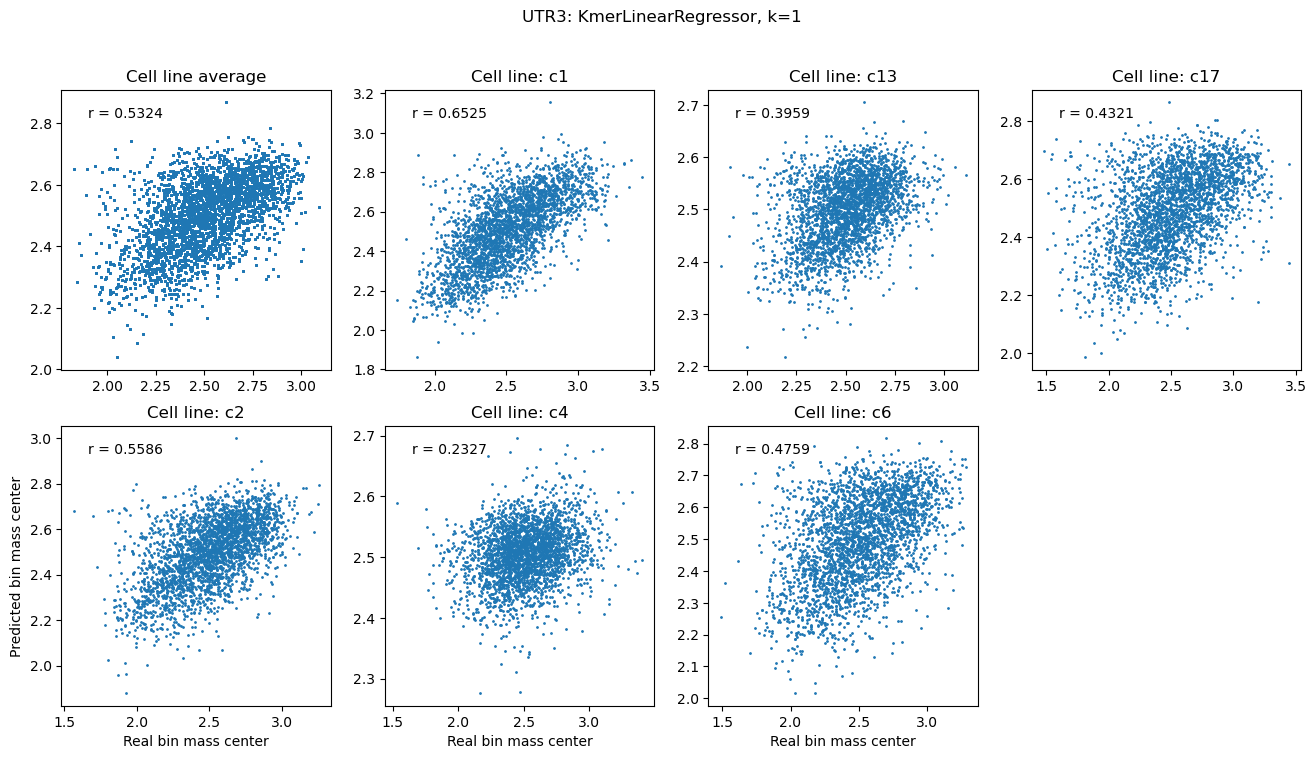

In [9]:
k = 1
cols = 4
rows = 2
fig = plt.figure(figsize=(16, 8))

ax = plt.subplot(rows, cols, 1)
regressor = KmerLinearRegressor(complement=False, kmer_length=k,
                                linreg_kws=None)
regressor.fit(train["seq"], train[predict_col])
pred = regressor.predict(test["seq"])

r = ss.pearsonr(test[predict_col], pred).statistic
ax.scatter(test[predict_col], pred, s=1)
plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)
plt.title("Cell line average")

for i, ct in enumerate(cell_types, 2):
    train_ctdf = train_ct[train_ct["cell_type"] == ct]
    test_ctdf = test_ct[test_ct["cell_type"] == ct]
    regressor = KmerLinearRegressor(complement=False, kmer_length=k,
                                    linreg_kws=None)
    regressor.fit(train_ctdf["seq"], train_ctdf[predict_col_ct])
    pred = regressor.predict(test_ctdf["seq"])

    ax = plt.subplot(rows, cols, i)
    r = ss.pearsonr(test_ctdf[predict_col_ct], pred).statistic
    ax.scatter(test_ctdf[predict_col_ct], pred, s=1)
    plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)
    
    plt.title(f"Cell line: {ct}")
    if (i - 1) // cols == rows - 1:
        plt.xlabel("Real bin mass center")
    if i % cols == 1:
        plt.ylabel("Predicted bin mass center")
plt.suptitle(f"{src_file_code}: KmerLinearRegressor, k={k}")